In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

In [2]:
# Load and preprocess the data from the Excel sheet
data = pd.read_csv('stock_data.csv')  # Update with your Excel file path

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,45.158333,45.158333,44.116665,44.441666,25.716892,1375158.0
1,2013-01-02,44.500000,45.416664,44.491665,45.333332,26.232870,1936392.0
2,2013-01-03,45.658333,45.658333,44.883331,45.258331,26.189466,1146306.0
3,2013-01-04,45.349998,48.133331,45.258331,46.858334,27.115335,10010520.0
4,2013-01-07,45.375000,48.308334,45.375000,46.875000,27.124977,10881438.0


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2.546000e+03
mean,78.676227,79.720872,77.510117,78.524990,57.714458,1.557680e+07
std,27.546499,27.808103,27.147919,27.448030,21.398289,1.606227e+07
min,31.758333,32.566666,31.000000,32.150002,18.604118,0.000000e+00
25%,58.333332,59.312501,57.427083,58.335417,39.908987,6.513252e+06
50%,72.512501,73.274998,71.699997,72.354164,62.231180,1.157755e+07
75%,95.689581,96.664581,94.191664,95.266663,76.085016,1.925642e+07
max,152.833328,154.316666,149.350006,151.566666,101.963768,3.148937e+08


In [5]:
#Reindexing using date
data.set_index(pd.DatetimeIndex(data['Date']), inplace = True)

In [6]:
#checking the null values
data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [7]:
data = data.dropna(axis=0)

In [8]:
# Select the required columns for training
train_data = data[['Open', 'High', 'Low', 'Volume']]

In [9]:
# Split the data into features and target variable
X = train_data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [10]:
train_data.isnull().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [11]:
train_data.head()

,Open,High,Low,Volume
Date,,,,
2013-01-01,45.158333,45.158333,44.116665,1375158.0
2013-01-02,44.500000,45.416664,44.491665,1936392.0
2013-01-03,45.658333,45.658333,44.883331,1146306.0
2013-01-04,45.349998,48.133331,45.258331,10010520.0
2013-01-07,45.375000,48.308334,45.375000,10881438.0


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [16]:
# Predict using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

In [17]:
# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [18]:
# Create a comparison dataframe for evaluation metrics
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'MSE': [mse_rf, mse_lr],
    'RMSE': [rmse_rf, rmse_lr],
    'MAE': [mae_rf, mae_lr],
    'R-squared': [r2_rf, r2_lr]
})

In [19]:
# Print the comparison dataframe
print("Comparison of Model Performance:")
comparison_df

Comparison of Model Performance:


,Model,MSE,RMSE,MAE,R-squared
0,Random Forest,0.565892,0.752258,0.512346,0.999288
1,Linear Regression,0.344001,0.586516,0.392939,0.999567


In [20]:
# Calculate the accuracies of the models
rf_accuracy = rf_model.score(X_test, y_test)
lr_accuracy = lr_model.score(X_test, y_test)
accuracies = pd.DataFrame({'Random Forest': [rf_accuracy], 'Linear Regression': [lr_accuracy]})
print('Accuracy of the both models :')
accuracies

Accuracy of the both models :


,Random Forest,Linear Regression
0,0.999288,0.999567


In [21]:
# Create a DataFrame to store the actual and predicted prices
results_df = pd.DataFrame({'Actual Price': y_test,
                           'Random Forest Predicted Price': y_pred_rf,
                           'Linear Regression Predicted Price': y_pred_lr})
results_df
# Sort the DataFrame by the date in ascending order
results_df_sorted = results_df.sort_index()

# Display the sorted DataFrame
results_df_sorted

,Actual Price,Random Forest Predicted Price,Linear Regression Predicted Price
Date,,,
2013-02-05,55.408333,54.667416,54.904598
2013-02-11,52.066666,52.270416,52.297856
2013-02-12,52.841667,52.784749,52.845839
2013-03-01,49.808334,49.611249,49.702929
2013-03-04,50.633331,50.204750,50.149091
...,...,...,...
2023-04-03,77.500000,77.512833,77.673675
2023-04-05,77.150002,77.277998,77.358915
2023-04-12,78.000000,77.901335,77.802022


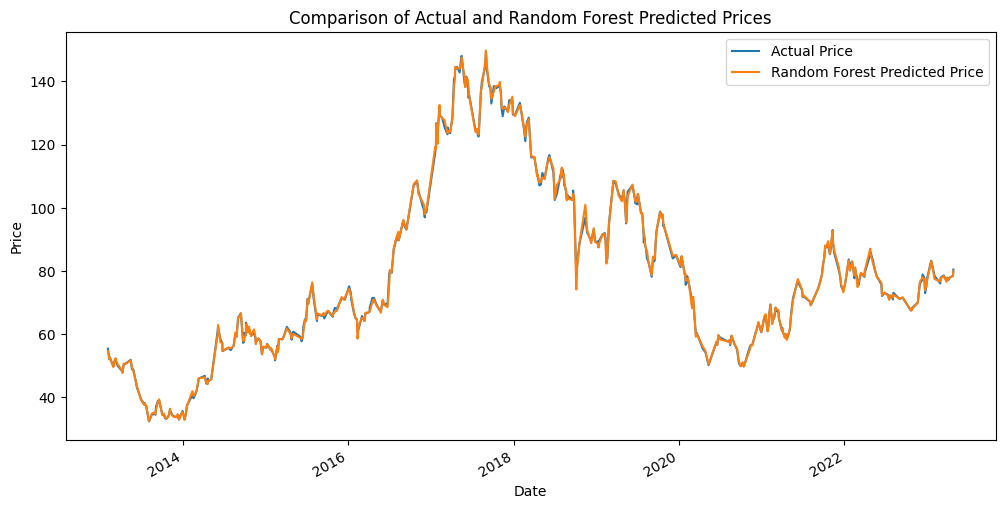

In [22]:
# Create a DataFrame to store the actual and predicted prices
results_df1 = pd.DataFrame({'Actual Price': y_test,
                           'Random Forest Predicted Price': y_pred_rf})
# Sort the DataFrame by the date in ascending order
results_df_sorted1 = results_df1.sort_index()

results_df_sorted1.plot(figsize=(12, 6))

# Set the plot title and labels
plt.title('Comparison of Actual and Random Forest Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

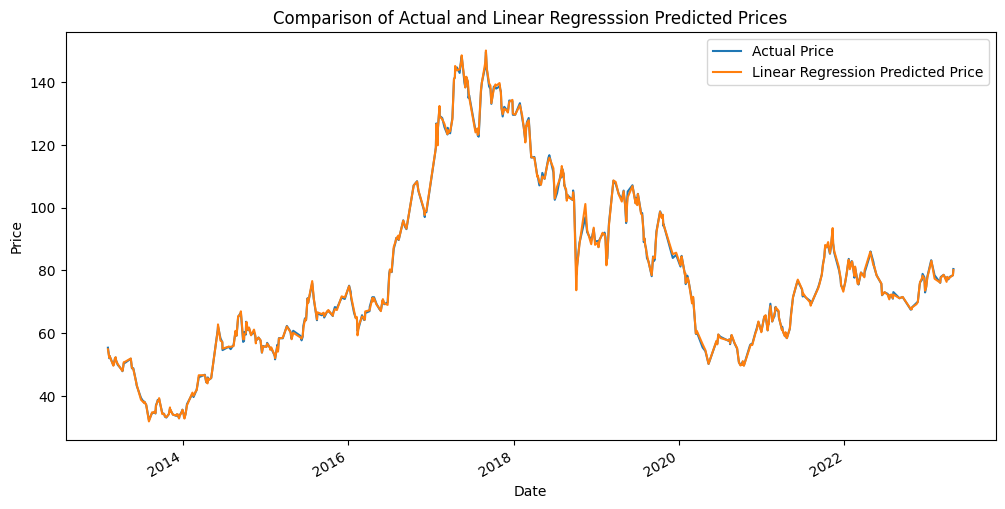

In [23]:
# Create a DataFrame to store the actual and predicted prices
results_df2 = pd.DataFrame({'Actual Price': y_test,
                           'Linear Regression Predicted Price': y_pred_lr})
# Sort the DataFrame by the date in ascending order
results_df_sorted2 = results_df2.sort_index()

results_df_sorted2.plot(figsize=(12, 6))

# Set the plot title and labels
plt.title('Comparison of Actual and Linear Regresssion Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

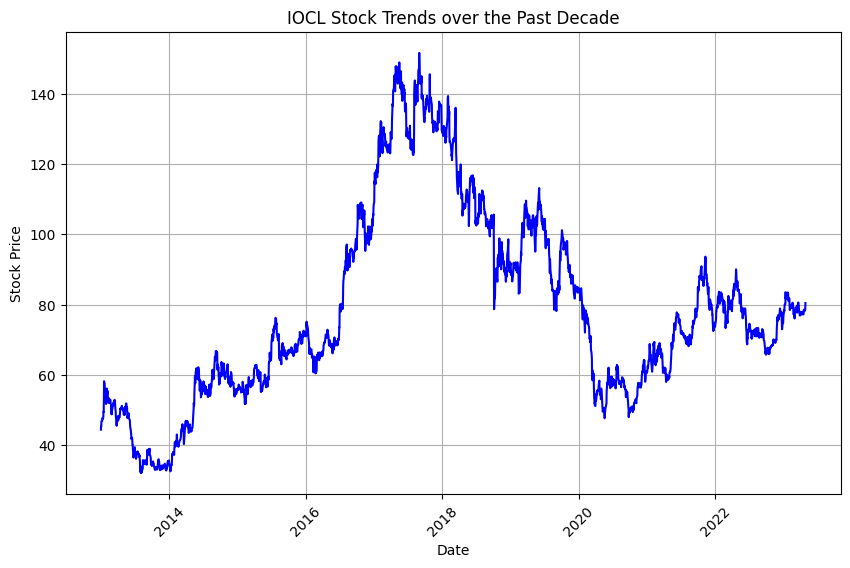

In [24]:
dates = pd.to_datetime(data['Date'])
stock_prices = data['Close']

# Set up the figure
plt.figure(figsize=(10, 6))
plt.plot(dates, stock_prices, color='blue')

# Customize the plot
plt.title('IOCL Stock Trends over the Past Decade')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

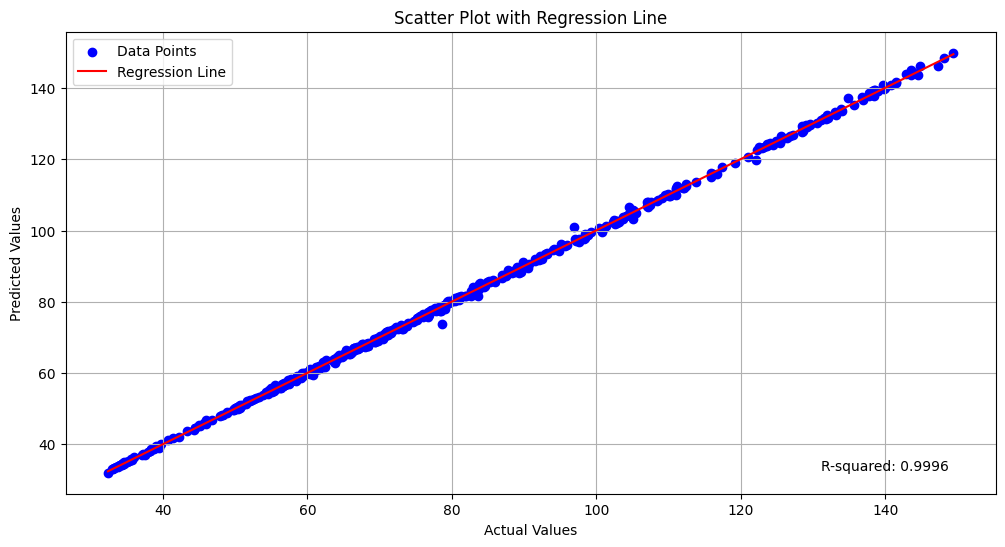

In [25]:
# Calculate R-squared error
r2_error = r2_score(y_test, y_pred_lr)

plt.figure(figsize=(12, 6))

# Create scatter plot
plt.scatter(y_test, y_pred_lr, color='b', label='Data Points')

# Create regression line
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_lr, 1))(np.unique(y_test)), color='r', label='Regression Line')

# Display R-squared error on the plot
plt.text(0.95, 0.05, f'R-squared: {r2_error:.4f}', transform=plt.gca().transAxes, ha='right')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [28]:
# Save the models to pickle files
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))